In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
# Data Collection and Preprocessing
car_dataset = pd.read_csv('car data.csv')

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_dataset.shape

(301, 9)

In [5]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


### Label Encoding

In [10]:
# Encoding fuel type column
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace = True)

# Encoding seller type column
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace = True)

# Encoding transmission column
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace = True)

In [11]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [12]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


### Splitting the Dataset

In [13]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis = 1)
Y = car_dataset['Selling_Price']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

## Model Training
### 1. Linear Regression

In [15]:
lin_reg_model = LinearRegression()

In [17]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [18]:
training_data_prediction = lin_reg_model.predict(X_train)
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(error_score)

0.8799451660493708


### Visualize the actual prices and predicted prices

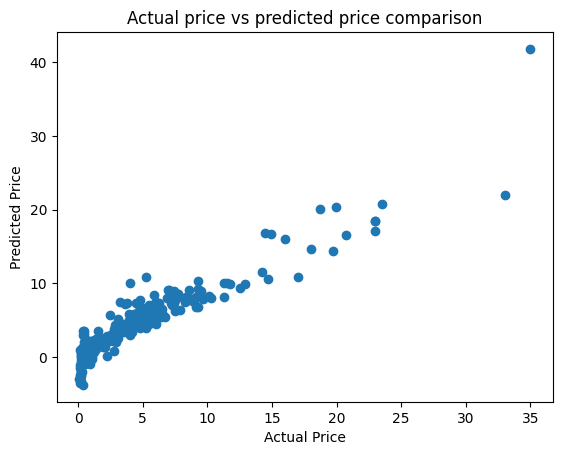

In [19]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs predicted price comparison")
plt.show()

### 2. Lasso Regression

In [20]:
lasso_reg_model = Lasso()

In [21]:
lasso_reg_model.fit(X_train, Y_train)

Lasso()

In [22]:
training_data_prediction = lasso_reg_model.predict(X_train)
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(error_score)

0.8427856123435794


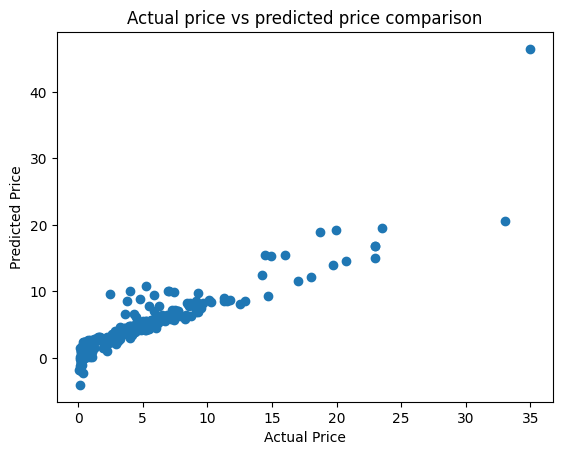

In [23]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs predicted price comparison")
plt.show()